# EDA

Working for a company that provides **telecommunications services**, I was commissioned to carry out a complete analysis that allows you to recognize the *behavior of this sector at the national level*.

 Consider that the main activity of the company is to provide Internet access, but it is also important to consider the behavior associated with the rest of the communication services, in order to:
 
 + guide the company in providing a good quality of its services
 + identify growth opportunities
 + be able to propose customized solutions to its potential customers.

There are several datasets available, a first step would be to get familiar and understand them.

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Internet Penetracion

Here, the aim is to have a first approach to the situation in the national context.

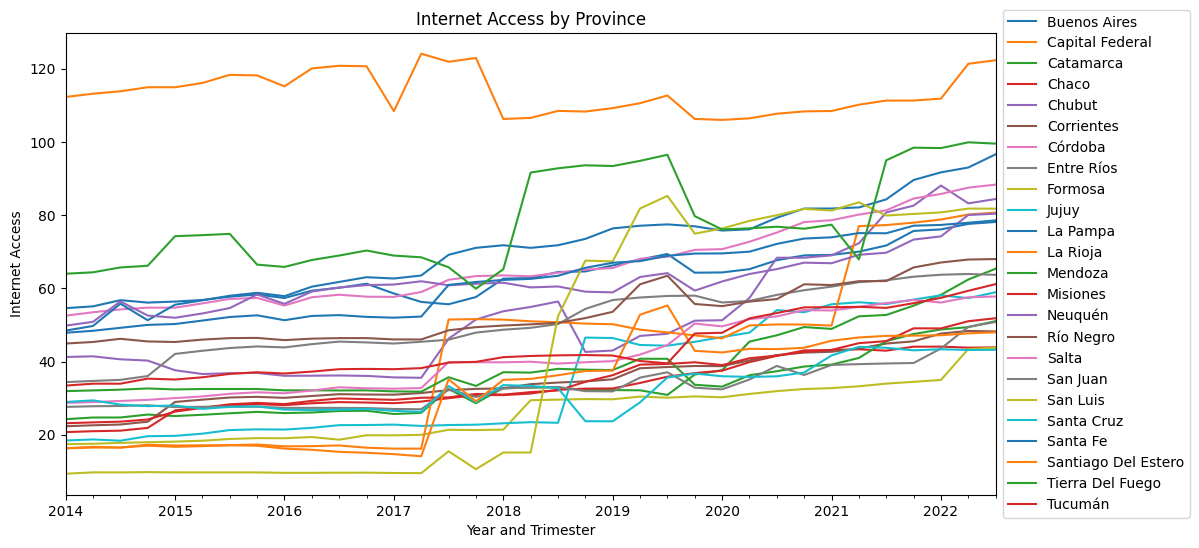

In [168]:
filepath = './datasets/'

df = pd.read_csv(filepath + 'Internet_Penetracion.csv')
# Replace commas with periods in the 'access' column
df['Accesos por cada 100 hogares'] = df['Accesos por cada 100 hogares'].str.replace(',', '.')

# Convert the 'access' column to a float
df['Accesos por cada 100 hogares'] = df['Accesos por cada 100 hogares'].astype(float)

# Convert the trimester and year columns into a single datetime column
df['date'] = pd.to_datetime(df['Año'].astype(str) + 'Q' + df['Trimestre'].astype(str))

# Create a pivot table to group the data by province and date
pivot_table = pd.pivot_table(df, index='Provincia', columns='date', values='Accesos por cada 100 hogares')

# Create a line plot for each province
pivot_table.T.plot(title='Internet Access by Province', figsize=(12,6))

# Set the axis labels
plt.xlabel('Year and Trimester')
plt.ylabel('Internet Access')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

From the above, I note that there is a *common trend* toward a growing number of access. That means that all the provinces (with their own pace) are growing in this sense.

The more relegated one is **Formosa**, however it would be expected as it is a province with poverty and precariousness problems.

### Internet Penetration National level

Calculate the percentage of the population in each area that has access to the internet. This metric will give an indication of the overall internet usage in different areas.

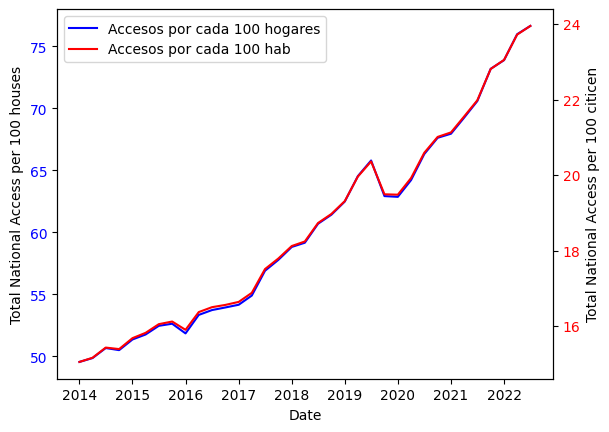

In [169]:
filepath = './datasets/'
df = pd.read_csv(filepath + 'Internet_Penetracion_nacional.csv')

# Replace commas with periods in the 'access' column
df['Accesos por cada 100 hogares'] = df['Accesos por cada 100 hogares'].str.replace(',', '.')
df['Accesos por cada 100 hab'] = df['Accesos por cada 100 hab'].str.replace(',', '.')

# Convert the 'access' column to a float
df['Accesos por cada 100 hogares'] = df['Accesos por cada 100 hogares'].astype(float)
df['Accesos por cada 100 hab'] = df['Accesos por cada 100 hab'].astype(float)

# Convert the trimester and year columns into a single datetime column
df['date'] = pd.to_datetime(df['Año'].astype(str) + 'Q' + df['Trimestre'].astype(str))


# Create a figure and axes object
fig, ax1 = plt.subplots()

# Define the x-axis data
x = df['date']

# Define the y-axis data for the first column
y1 = df['Accesos por cada 100 hogares']

# Create a line plot for the first column
ax1.plot(x, y1, label='Accesos por cada 100 hogares', color='blue')

# Set the axis label and tick parameters for the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Total National Access per 100 houses')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right side of the plot
ax2 = ax1.twinx()

# Define the y-axis data for the second column
y2 = df['Accesos por cada 100 hab']

# Create a line plot for the second column
ax2.plot(x, y2, label='Accesos por cada 100 hab', color='red')

# Set the axis label and tick parameters for the second y-axis
ax2.set_ylabel('Total National Access per 100 citicen')
ax2.tick_params(axis='y', labelcolor='red')

# Add a legend to the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Show the plot
plt.show()

It can be appreciated a growing tendency. With a gap close to the last president elections.

#### Comparison with individual Provinces

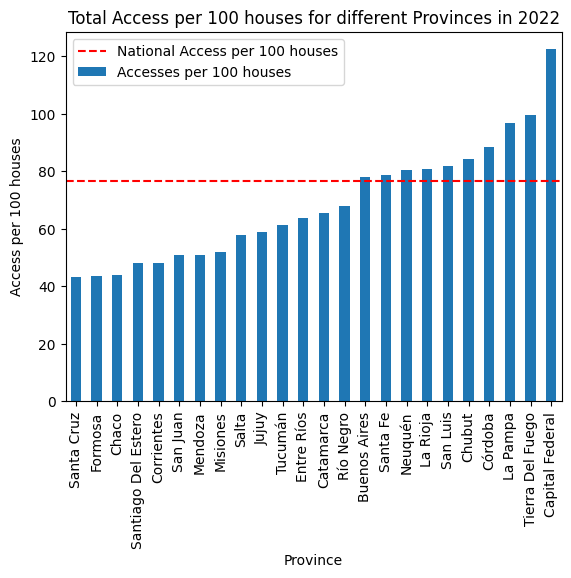

In [177]:
filepath = './datasets/'

df = pd.read_csv(filepath + 'Internet_Penetracion.csv')

# Replace commas with periods in the 'access' column
df.rename(columns={'Accesos por cada 100 hogares': 'Accesses per 100 houses'}, inplace=True)
df['Accesses per 100 houses'] = df['Accesses per 100 houses'].str.replace(',', '.')
# Convert the 'access' column to a float
df['Accesses per 100 houses'] = df['Accesses per 100 houses'].astype(float)

# Convert the trimester and year columns into a single datetime column
df['date'] = pd.to_datetime(df['Año'].astype(str) + 'Q' + df['Trimestre'].astype(str))


# Filter the DataFrame to include only the rows where year is 2022
df_2022 = df[df['Año']==2022]
df_2022 = df_2022[df_2022['Trimestre']==3]
df_2022 = df_2022[['Provincia','Accesses per 100 houses']]
df_2022 = df_2022.set_index('Provincia')

# Calculate the mean value of the y-axis data
df_nat = pd.read_csv(filepath + 'Internet_Penetracion_nacional.csv')
# Replace commas with periods in the 'access' column
df_nat['Accesos por cada 100 hogares'] = df_nat['Accesos por cada 100 hogares'].str.replace(',', '.')
df_nat['Accesos por cada 100 hogares'] = df_nat['Accesos por cada 100 hogares'].astype(float)
df_nat = df_nat[df_nat['Año']==2022]
df_nat = df_nat[df_nat['Trimestre']==3]
mean_value = df_nat['Accesos por cada 100 hogares'].values[0]

# Plot sorted by number of access per house
ax = df_2022.sort_values('Accesses per 100 houses').plot(kind='bar')

# Add a horizontal line with the mean value
ax.axhline(mean_value, color='red', linestyle='--', label='National Access per 100 houses')

# Set the title, x-axis label, and y-axis label
plt.title('Total Access per 100 houses for different Provinces in 2022')
plt.xlabel('Province')
plt.ylabel('Access per 100 houses')

# Add a legend to the plot
plt.legend()
# Show the plot
plt.show()

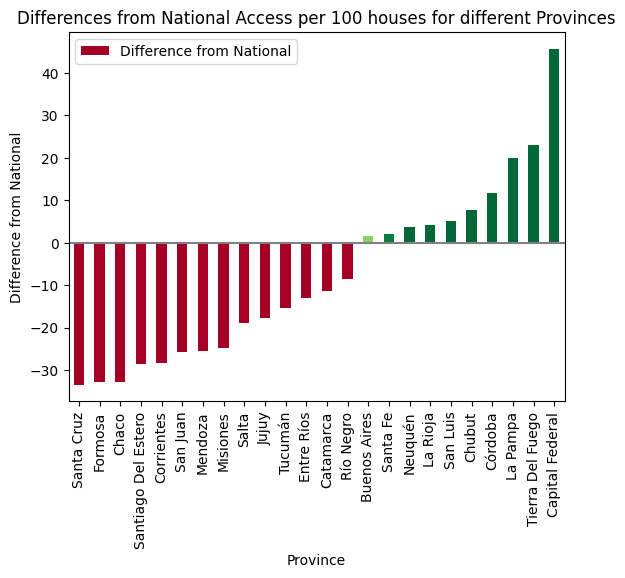

In [178]:
df_2022['Difference from National'] = df_2022['Accesses per 100 houses'] - mean_value

# Define the colormap for the diverging bar chart
cmap = plt.get_cmap('RdYlGn')

# Create the bar plot
df_2022 = df_2022.sort_values('Difference from National')
ax = df_2022.plot(kind='bar',  y='Difference from National', 
                                                         color=cmap(df_2022['Difference from National']/2))

# Add a horizontal line at the mean value
ax.axhline(0, color='gray')

# Set the title, x-axis label, and y-axis label
plt.title('Differences from National Access per 100 houses for different Provinces')
plt.xlabel('Province')
plt.ylabel('Difference from National')

# Show the plot
plt.show()

From the above, we can identify several provinces that are way below the national average internet access.

Those Provinces are emerging as potential growth areas.

## National total of broadband and narrowband Internet accesses

In this dataframe, data regarding the proportion of Internet accesses through Dial up and Broadband connection is presented.

Dial-up is a type of internet connection that uses a telephone line to establish a connection to the internet. When you dial up, your computer uses a modem to convert digital data into analog signals that can be transmitted over the telephone line. The maximum speed of a dial-up connection is limited by the bandwidth of the telephone line, which is typically around 56 kilobits per second (Kbps). Dial-up is a relatively slow and outdated technology, and it is no longer widely used today.

Wideband internet communication, on the other hand, refers to any type of internet connection that has a higher bandwidth than dial-up. This includes cable, DSL, fiber optic, and satellite internet connections, among others. These types of connections are generally much faster than dial-up and can provide download and upload speeds of several megabits per second (Mbps) or more. They also allow for more efficient use of the internet, enabling users to stream video, download large files, and engage in other bandwidth-intensive activities.

C:\Users\carna\AppData\Local\Temp\ipykernel_10748\561482372.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[column] = df[column].str.replace('.', '')


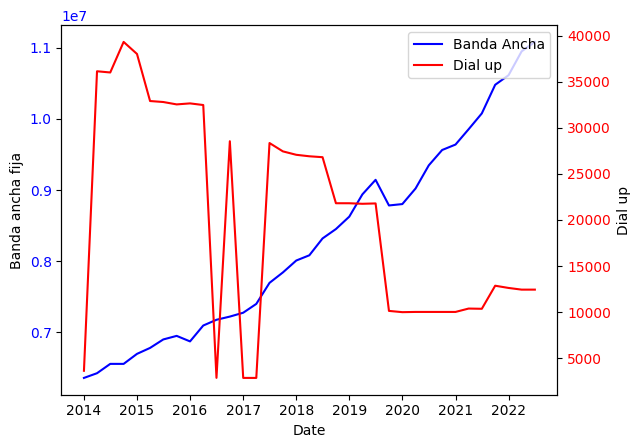

In [170]:
df = pd.read_csv(filepath + 'Internet_BAF.csv')

# Replace commas with periods in the 'access' column
columns = ['Banda ancha fija',	'Dial up',	'Total']
for column in columns:
    df[column] = df[column].astype(str)
    df[column] = df[column].str.replace('.', '')
    df[column] = df[column].astype(int)

# Convert the trimester and year columns into a single datetime column
df['date'] = pd.to_datetime(df['Año'].astype(str) + 'Q' + df['Trimestre'].astype(str))


# Create a figure and axes object
fig, ax1 = plt.subplots()

# Define the x-axis data
x = df['date']

# Define the y-axis data for the first column
y1 = df['Banda ancha fija']

# Create a line plot for the first column
ax1.plot(x, y1, label='Banda Ancha', color='blue')

# Set the axis label and tick parameters for the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Banda ancha fija')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right side of the plot
ax2 = ax1.twinx()

# Define the y-axis data for the second column
y2 = df['Dial up']

# Create a line plot for the second column
ax2.plot(x, y2, label='Dial up', color='red')

# Set the axis label and tick parameters for the second y-axis
ax2.set_ylabel('Dial up')
ax2.tick_params(axis='y', labelcolor='red')

# Add a legend to the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Show the plot
plt.show()

Disregarding some outliers in the Dial Up column, It can be appreciated that *Dial up* has a decreasing tendency while the *Broadband* has a increasing tendency, which is expected as it is the transition from a outdated technology towards to a more modern one.

### Provinces total of broadband and narrowband Internet accesses

Aligned with the previous plot, The relation between Dial up and Broadband over the different provinces.

C:\Users\carna\AppData\Local\Temp\ipykernel_10748\2797369281.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[column] = df[column].str.replace('.', '')


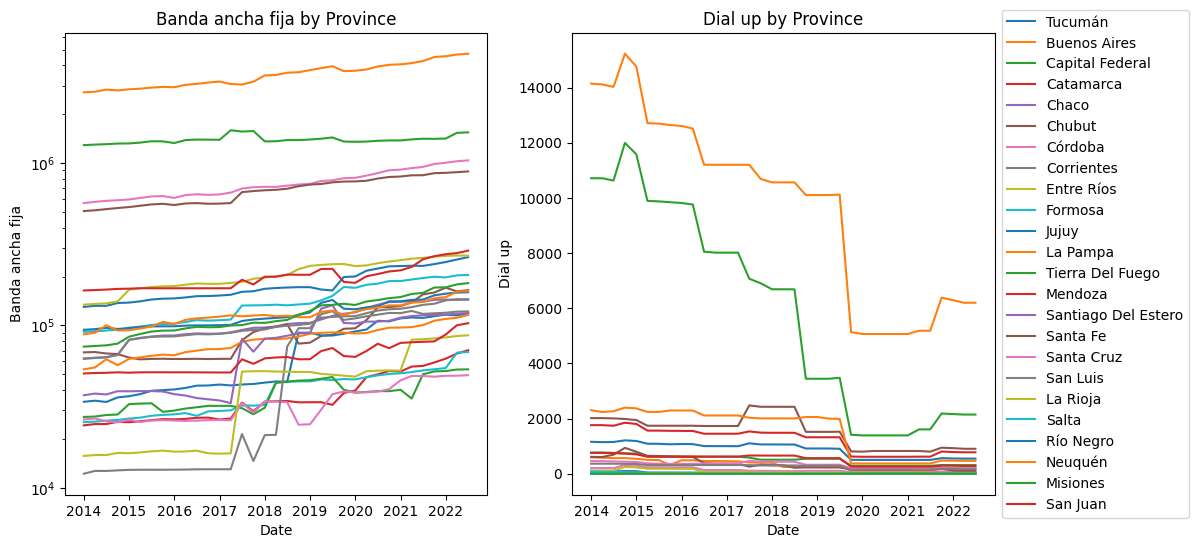

In [171]:
df = pd.read_csv(filepath + 'Internet_BAF_providence.csv')

df['Dial up'] = df['Dial up'].fillna(0)
# Replace commas with periods in the 'access' column
columns = ['Banda ancha fija',	'Dial up',	'Total']
for column in columns:
    df[column] = df[column].astype(str)
    df[column] = df[column].str.replace('.', '')
    df[column] = df[column].str.replace('-', '')
    df[column] = df[column].astype(int)

# Convert the trimester and year columns into a single datetime column
df['date'] = pd.to_datetime(df['Año'].astype(str) + 'Q' + df['Trimestre'].astype(str))

# Sort the data by date in ascending order
df = df.sort_values('date')

# Create a figure with two subplots
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6), sharex=False, sharey=False)

# Create a pivot table for each subplot, grouped by province
pivot_table1 = pd.pivot_table(df, index='date', columns='Provincia', values='Banda ancha fija')
pivot_table2 = pd.pivot_table(df, index='date', columns='Provincia', values='Dial up')

# Create a line plot for each province in the first subplot
# Define a list of provinces
provinces = df['Provincia'].unique()
for province in provinces:
    ax1.plot(x.sort_values(ascending=True), pivot_table1[province], label=province)


# Set the y-axis scale to logarithmic for the first subplot
ax1.set_yscale('log')

# Set the axis labels and title for the first subplot
ax1.set_xlabel('Date')
ax1.set_ylabel('Banda ancha fija')
ax1.set_title('Banda ancha fija by Province')

# Add a legend to the first subplot
#ax1.legend()

# Create a line plot for each province in the second subplot
for province in provinces:
    ax2.plot(x.sort_values(ascending=True), pivot_table2[province], label=province)

# Set the y-axis scale to logarithmic for the first subplot
#ax2.set_yscale('log')

# Set the axis labels and title for the second subplot
ax2.set_xlabel('Date')
ax2.set_ylabel('Dial up')
ax2.set_title('Dial up by Province')


# Create the legend for the first subplot and place it outside of the plot
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plots
plt.show()


In general, Provinces tendencies are similar to the ones of the national.

## Internet Access Technologies

In this subsection, the objective is to analyze some tendencies of the different technologies in order to find out which are the more demanded ones.

Something to note is that National level data may not match with the values obtained from Provinces level, as the dataset warns that new information was incorporated in the Provinces level.

C:\Users\carna\AppData\Local\Temp\ipykernel_10748\2159538178.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_tot[column] = df_tot[column].str.replace('.', '')


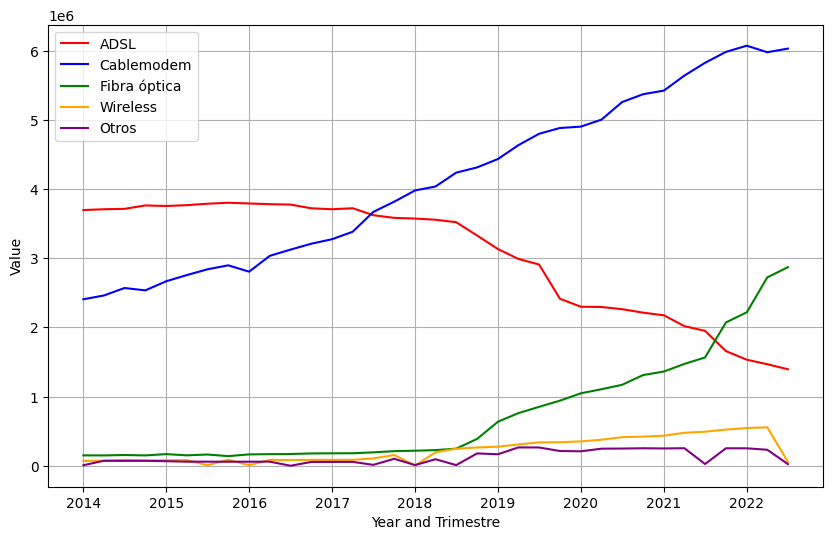

In [172]:
df_tot = pd.read_csv(filepath + 'Internet_Accesos_techs_total.csv')

df_prov = pd.read_csv(filepath + 'Internet_Accesos_techs.csv')

df_prov = df_prov.dropna()
columns = ['ADSL',	'Cablemodem',	'Fibra óptica',	'Wireless',	'Otros',	'Total']
for column in columns:
    df_tot[column] = df_tot[column].astype(str)
    df_tot[column] = df_tot[column].str.replace('.', '')
    df_tot[column] = df_tot[column].str.replace('-', '')
    df_tot[column] = df_tot[column].astype(int)

# Convert the trimester and year columns into a single datetime column
df_tot['date'] = pd.to_datetime(df_tot['Año'].astype(str) + 'Q' + df_tot['Trimestre'].astype(str))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the values of each column against time
ax.plot(df_tot['date'], df_tot['ADSL'], color='red', label='ADSL')
ax.plot(df_tot['date'], df_tot['Cablemodem'], color='blue', label='Cablemodem')
ax.plot(df_tot['date'], df_tot['Fibra óptica'], color='green', label='Fibra óptica')
ax.plot(df_tot['date'], df_tot['Wireless'], color='orange', label='Wireless')
ax.plot(df_tot['date'], df_tot['Otros'], color='purple', label='Otros')
#ax.plot(df_tot['date'], df_tot['Total'], color='black', label='Total')

# Set the axis labels and title
ax.set_xlabel('Year and Trimestre')
ax.set_ylabel('Value')
ax.legend()
ax.grid()

From the above, it can be conclude that the main technologies are:
+ ADSL
+ Cable Modem
+ Optical fiber

However, ADSL is clearly getting outdated. And the users are preferring the Optical Fiber technology, which is growing rapidly since 2018.

## Evolution of Internet Speed


#### National Context

C:\Users\Marco\AppData\Local\Temp\ipykernel_1572\657505537.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_national['date'] = pd.to_datetime(df_national['Año'].astype(str) + 'Q' + df_national['Trimestre'].astype(str))


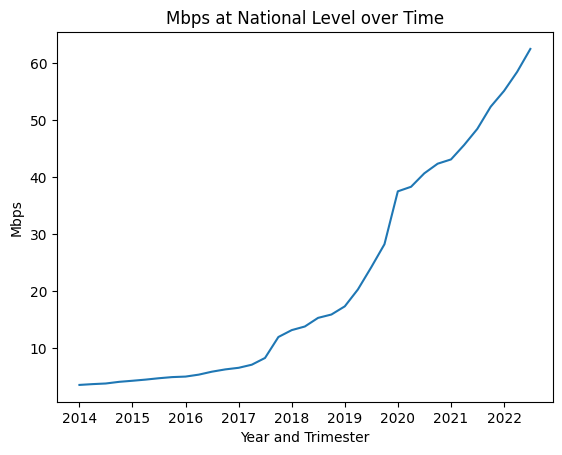

In [3]:
filepath = './datasets/'
df_national = pd.read_csv(filepath + 'historico_velocidad_internet_nacional.csv')
columns = ['Mbps (Media de bajada)']
for column in columns:
    df_national[column] = df_national[column].astype(str)
    df_national[column] = df_national[column].str.replace(',', '.')
    df_national[column] = df_national[column].str.replace('-', '')
    df_national[column] = df_national[column].str.replace('*', '')
    df_national[column] = df_national[column].astype(float)

# Convert the trimester and year columns into a single datetime column
df_national['date'] = pd.to_datetime(df_national['Año'].astype(str) + 'Q' + df_national['Trimestre'].astype(str))

# Create a line plot for each column
plt.plot(df_national['date'], df_national['Mbps (Media de bajada)'	], label='Mbps (Media de bajada)')

# Set the axis labels and title
plt.xlabel('Year and Trimester')
plt.ylabel('Mbps')
plt.title('Mbps at National Level over Time')

# Add a legend
#plt.legend()

# Show the plot
plt.show()

As it can be appreciated, there exist a demand for faster and faster Internet services, specially since 2018.

So, in order to attract customers, a **high speed services must be offered**.

#### Technologies distribution per Provinces

C:\Users\carna\AppData\Local\Temp\ipykernel_10748\2172159648.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_prov[column] = df_prov[column].str.replace('.', '')
C:\Users\carna\AppData\Local\Temp\ipykernel_10748\2172159648.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_prov[column] = df_prov[column].str.replace('*', '')


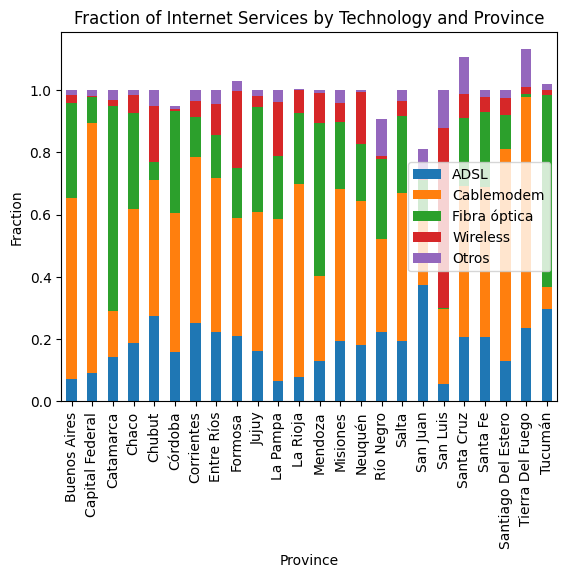

In [180]:
df_prov = pd.read_csv(filepath + 'Internet_Accesos_techs.csv')

df_prov = df_prov.dropna()
columns = ['Año','Trimestre','ADSL',	'Cablemodem',	'Fibra óptica',	'Wireless',	'Otros',	'Total']
for column in columns:
    df_prov[column] = df_prov[column].astype(str)
    df_prov[column] = df_prov[column].str.replace('.', '')
    df_prov[column] = df_prov[column].str.replace('-', '')
    df_prov[column] = df_prov[column].str.replace('*', '')
    df_prov[column] = df_prov[column].astype(int)

# Filter the DataFrame to include only the rows where year is 2022
df_2022 = df_prov[df_prov['Año']==2022]
df_2022 = df_2022[df_2022['Trimestre']==3]
# Define a list of columns to plot
columns = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
for column in columns:
    df_2022[column] = df_2022[column] / df_2022['Total']

# Define a list of provinces
provinces = df_prov['Provincia'].unique()

# Drop not used columns
df_2022 = df_2022.drop(['Año','Trimestre'], axis = 1)

# Create a stacked bar plot of the fraction of internet services brought by each technology for each province
ax = df_2022.set_index('Provincia')[columns].loc[provinces].plot(kind='bar', stacked=True)

# Set the title, x-axis label, and y-axis label
ax.set_title('Fraction of Internet Services by Technology and Province')
ax.set_xlabel('Province')
ax.set_ylabel('Fraction')

# Show the plot
plt.show()

It is of particular interest the fraction the ADSL represents, as it refers to the more outdated technology.

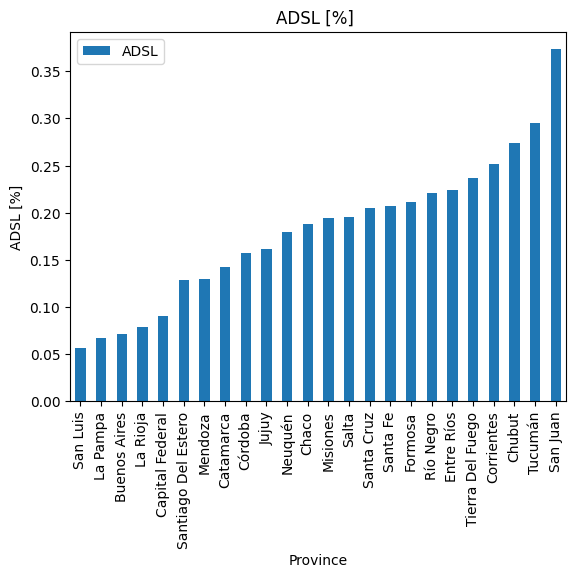

In [182]:
df_ADSL = df_2022[['Provincia','ADSL']]


# Create a bar plot of the average Mbps internet speed in each province
ax = df_ADSL.sort_values('ADSL').plot(kind='bar', x='Provincia', y='ADSL')

# Set the title, x-axis label, and y-axis label
ax.set_title('ADSL [%] ')
ax.set_xlabel('Province')
ax.set_ylabel('ADSL [%]')

# Show the plot
plt.show()

This plot enables to rapidly identify which provinces have a high percentage of outdated technologies, which will limit the improvement of the quality of services in the near future.

#### Provinces cases

C:\Users\carna\AppData\Local\Temp\ipykernel_10748\3611560984.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_prov[column] = df_prov[column].str.replace('*', '')


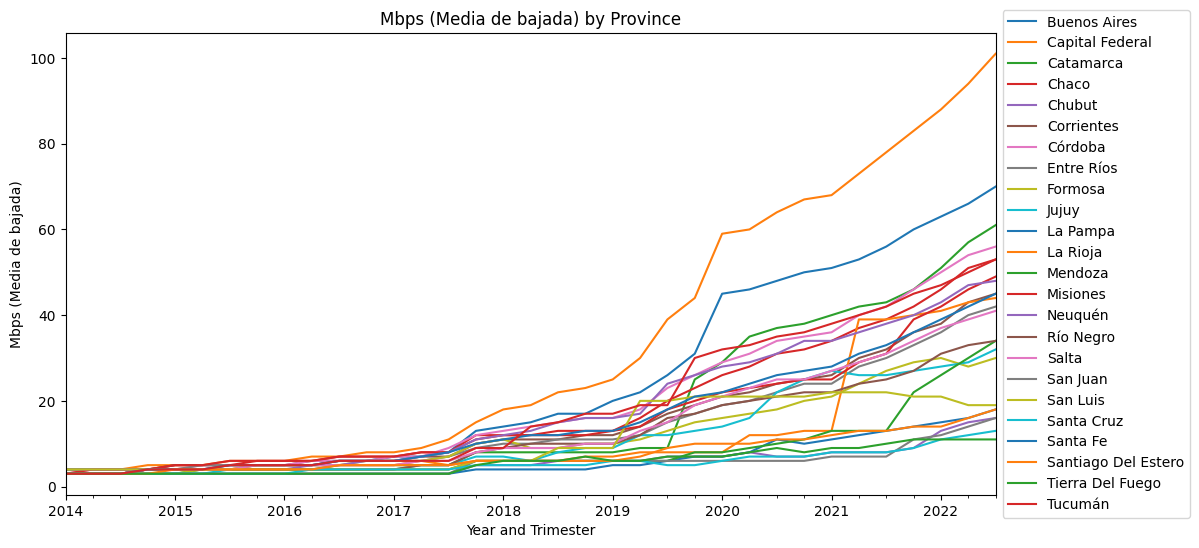

In [174]:
df_prov = pd.read_csv(filepath + 'historico_velocidad_internet.csv')
columns = ['Mbps (Media de bajada)']
for column in columns:
    df_prov[column] = df_prov[column].astype(str)
    df_prov[column] = df_prov[column].str.replace(',', '.')
    df_prov[column] = df_prov[column].str.replace('-', '')
    df_prov[column] = df_prov[column].str.replace('*', '')
    df_prov[column] = df_prov[column].astype(float)

df_prov = df_prov.drop(['Unnamed: 4',	'Unnamed: 5'], axis = 1)
# Convert the trimester and year columns into a single datetime column
df_prov['date'] = pd.to_datetime(df_prov['Año'].astype(str) + 'Q' + df_prov['Trimestre'].astype(str))

# Create a pivot table to group the data by province and date
pivot_table = pd.pivot_table(df_prov, index='Provincia', columns='date', values='Mbps (Media de bajada)')

# Create a line plot for each province
pivot_table.T.plot(title='Mbps (Media de bajada) by Province', figsize=(12,6))

# Set the axis labels
plt.xlabel('Year and Trimester')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

C:\Users\carna\AppData\Local\Temp\ipykernel_10748\121730638.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_prov[column] = df_prov[column].str.replace('*', '')


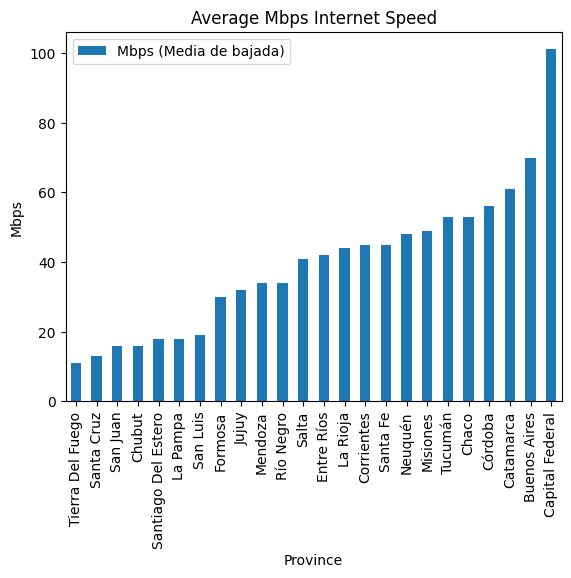

In [176]:
df_prov = pd.read_csv(filepath + 'historico_velocidad_internet.csv')
columns = ['Mbps (Media de bajada)']
for column in columns:
    df_prov[column] = df_prov[column].astype(str)
    df_prov[column] = df_prov[column].str.replace(',', '.')
    df_prov[column] = df_prov[column].str.replace('-', '')
    df_prov[column] = df_prov[column].str.replace('*', '')
    df_prov[column] = df_prov[column].astype(float)

df_prov = df_prov.drop(['Unnamed: 4',	'Unnamed: 5'], axis = 1)
df_prov2022 = df_prov[df_prov['Año'] == 2022]
df_prov2022 = df_prov2022[df_prov2022['Trimestre'] == 3]
df_prov2022 = df_prov2022[['Provincia','Mbps (Media de bajada)']]

# Create a bar plot of the average Mbps internet speed in each province
ax = df_prov2022.sort_values('Mbps (Media de bajada)').plot(kind='bar', x='Provincia', y='Mbps (Media de bajada)')

# Set the title, x-axis label, and y-axis label
ax.set_title('Average Mbps Internet Speed')
ax.set_xlabel('Province')
ax.set_ylabel('Mbps')

# Show the plot
plt.show()

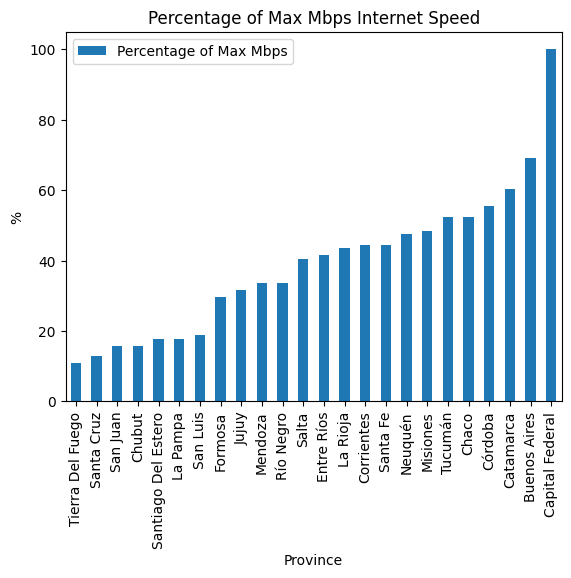

In [179]:
df_prov2022['Percentage of Max Mbps'] = df_prov2022['Mbps (Media de bajada)'] / df_prov2022['Mbps (Media de bajada)'].max() *100

# Create a bar plot of the average Mbps internet speed in each province
ax = df_prov2022.sort_values('Percentage of Max Mbps').plot(kind='bar',
                                                            x='Provincia',
                                                            y='Percentage of Max Mbps')

# Set the title, x-axis label, and y-axis label
ax.set_title('Percentage of Max Mbps Internet Speed')
ax.set_xlabel('Province')
ax.set_ylabel('%')

# Show the plot
plt.show()

There are many provinces that are noticeably relegated in the improvement of the average internet speed.

This should be considered in the context of a country where there is a growing trend towards remote work and working for companies based abroad. In this context, internet speed is a crucial requirement for customers aiming to enter this market.

### Market Share
 Analyze the market share of different internet service providers in each area. This metric can help you identify dominant players and their market presence in specific regions.

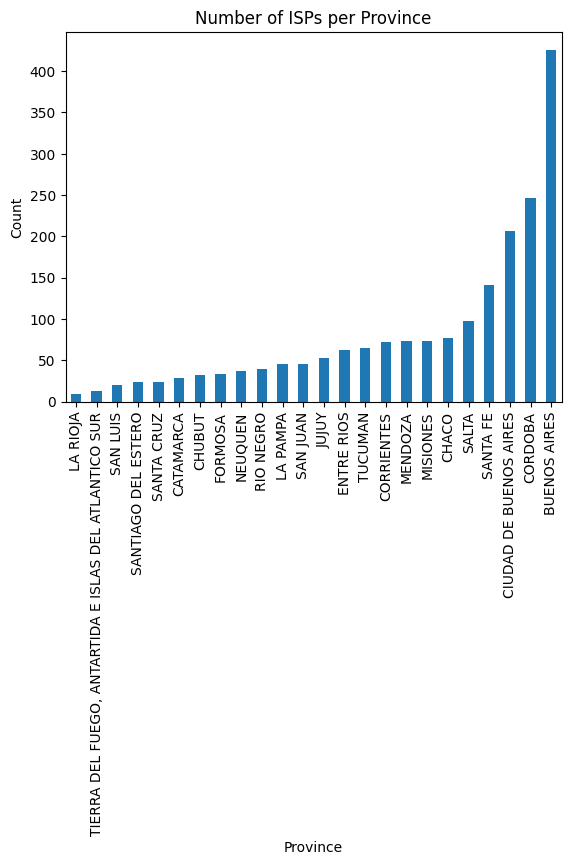

In [175]:
df_ISP = pd.read_csv(filepath + 'Licencias_TIC.csv')
df_ISP = df_ISP[df_ISP['SERVICIO'] == 'VA-ISP']


province_counts = df_ISP.groupby('PROVINCIA')['RAZON_SOCIAL'].nunique()
# Create a bar plot of the number of ISPs in each province
province_counts.sort_values().plot(kind='bar')

plt.title('Number of ISPs per Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.show()

This plot allows to identify areas where the market is highly competitive and areas where the number of competitors is low.

## Closing

Based on the undestanding achieved from this analysis, several KPIs will be defined in other notebook in order to evaluate areas of potential growth. Focusing on areas where the quality of services is poor compared with the average, areas where there is a high density of potential new costumber, areas where the population is interested in contracting high quality ISP, areas where there is a reduced number of market competitors. 